In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
data = pd.read_csv(r'C:\Users\Sudesh Surjan\Downloads\employee_data.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
data=data.drop_duplicates()

   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non

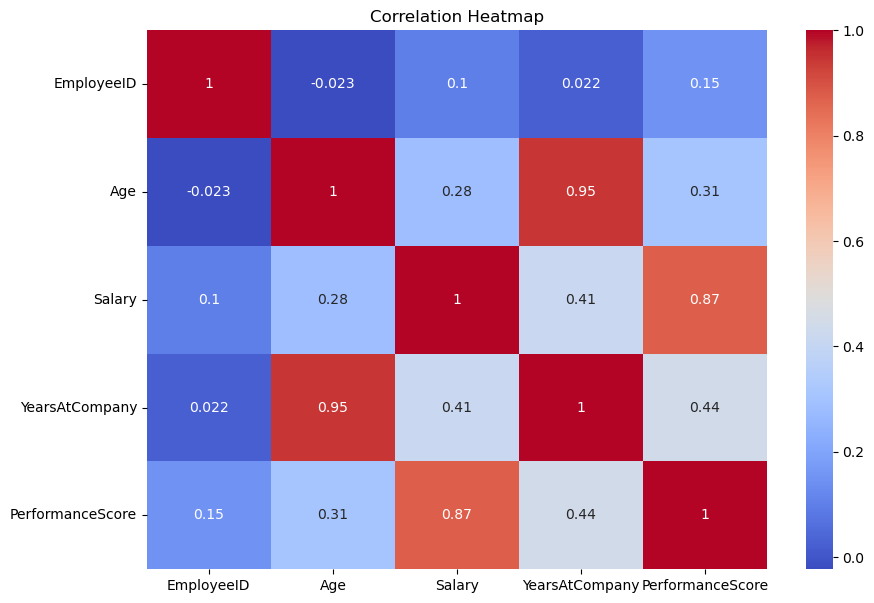

In [10]:
#correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

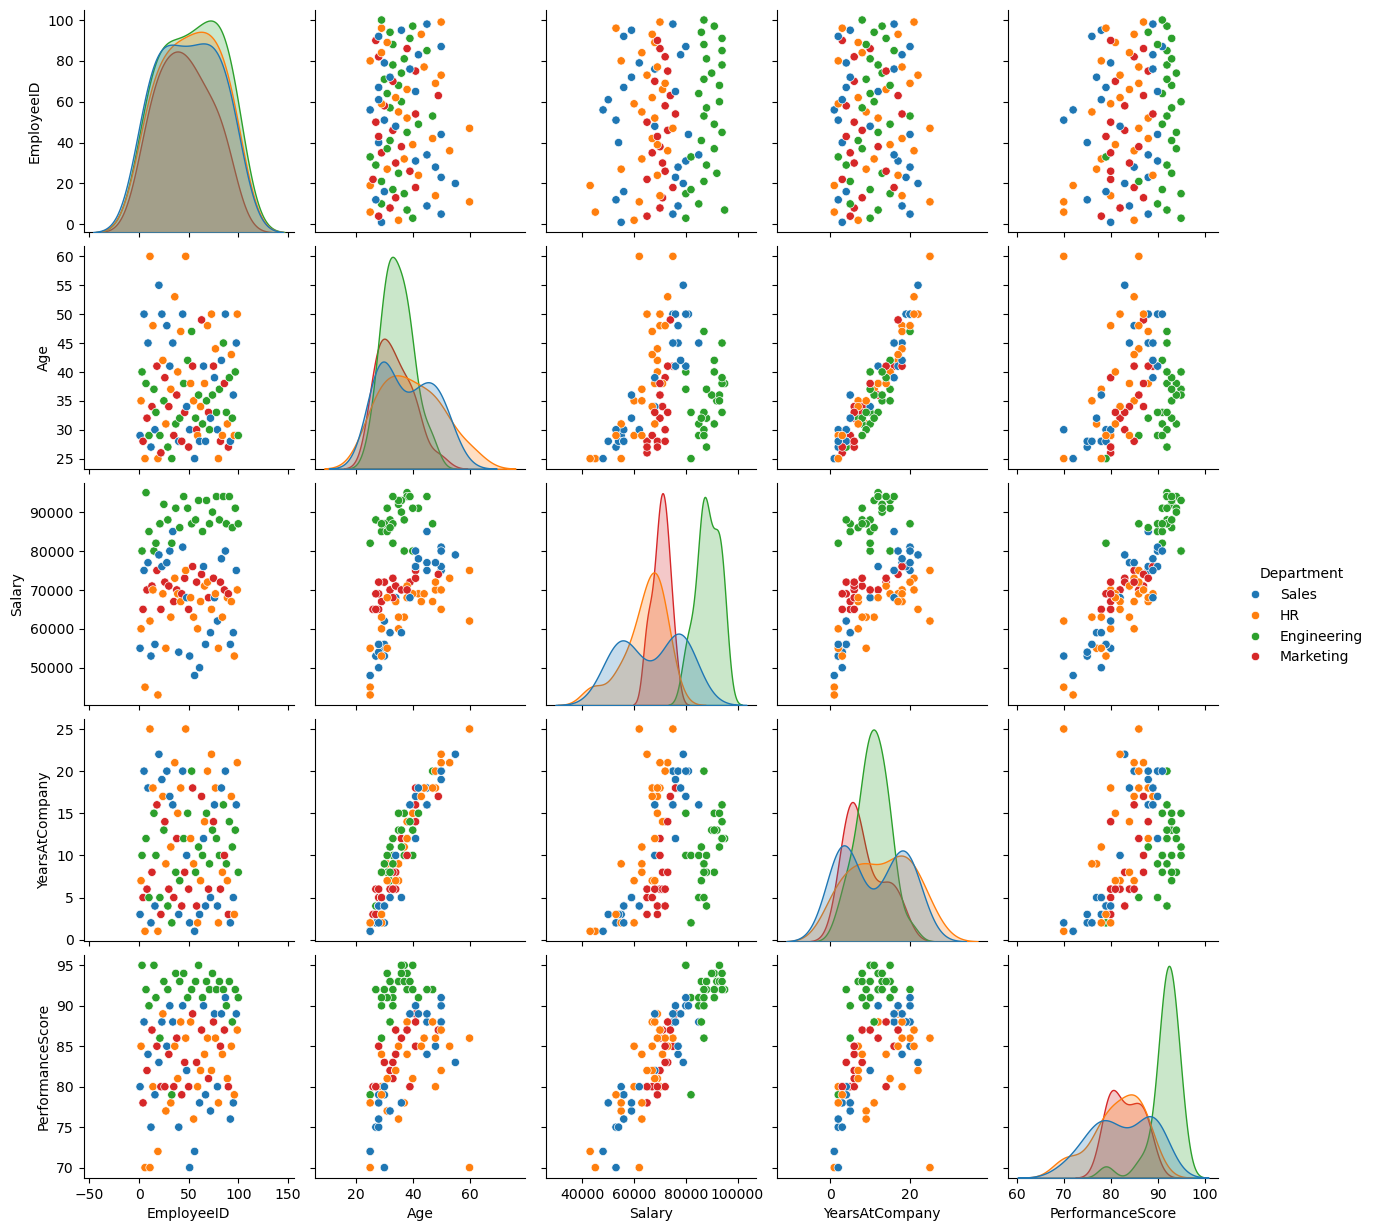

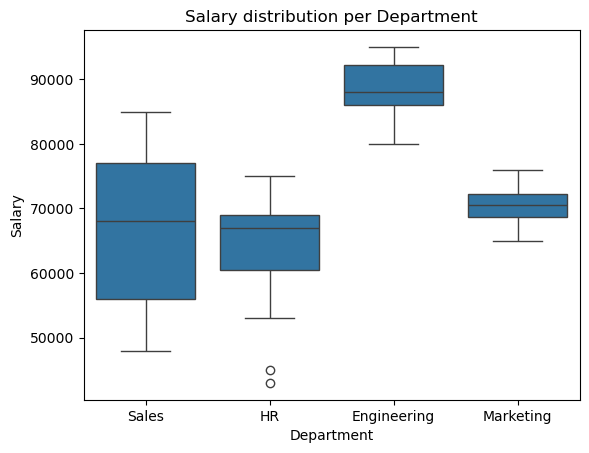

In [11]:
#pairplot
sns.pairplot(data, hue="Department")
plt.show()

#boxplot for outliers
sns.boxplot(x='Department',y='Salary', data=data)
plt.title('Salary distribution per Department')
plt.show()

In [12]:
#probability of attribute
attrition_prob = data['Attrition'].value_counts(normalize=True)['Yes']
print("probability of Atttrition:",attrition_prob)

#bayes' theorem example:
p_perf_given_attrition = len(data[(data['Attrition']=='Yes')&(data['PerformanceScore']>85)])/len(data[data['Attrition']=='Yes'])
p_perf = len(data[data['PerformanceScore']>85])/len(data)
p_attrition = len(data[data['Attrition']=='Yes'])/len(data)
p_attrition_given_perf = (p_perf_given_attrition * p_attrition)/p_perf
print("probability of attrition given high performance:",round(p_attrition_given_perf,3))


probability of Atttrition: 0.39
probability of attrition given high performance: 0.46


In [13]:
#hq: mean performance is same across department
dept_perf = [group["PerformanceScore"].values for name, group in data.groupby("Department")]
anova_test = stats.f_oneway(*dept_perf)
print("ANOVA F-statistic:", anova_test.statistic,"p-value:",anova_test.pvalue)

ANOVA F-statistic: 25.781068086646336 p-value: 2.5591493445552222e-12


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['Department'] = le.fit_transform(data['Department'])

scaler = StandardScaler()
data[['Salary','PerformanceScore','YearsAtCompany']] = scaler.fit_transform(data[['Salary','PerformanceScore','YearsAtCompany']])

Random Forest Classifier Results:
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



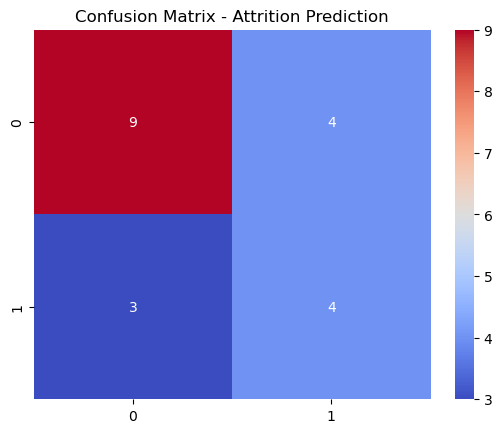

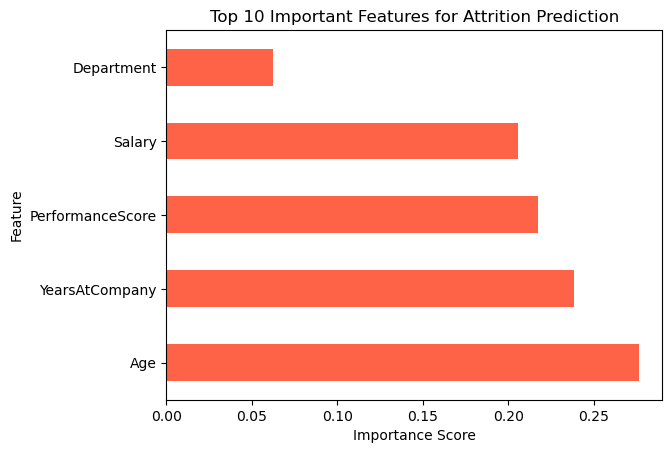

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = data.drop(['EmployeeID', 'Name', 'Attrition'], axis=1)
y = data['Attrition']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Classifier Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Attrition Prediction")
plt.show()

# Feature Importance plot
pd.Series(rf.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh', color='tomato')
plt.title('Top 10 Important Features for Attrition Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv(r'C:\Users\Sudesh Surjan\Downloads\employee_data.csv')

# Preprocess - encode categorical features and scale numerical
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])  # Yes->1, No->0
data['Department'] = le.fit_transform(data['Department'])

scaler = StandardScaler()
data[['Salary', 'PerformanceScore']] = scaler.fit_transform(data[['Salary', 'PerformanceScore']])

# Prepare features and labels for performance prediction (regression)
X_perf = data.drop(['EmployeeID', 'Name', 'PerformanceScore', 'Attrition'], axis=1)
y_perf = data['PerformanceScore']

# Split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

# Build and train performance prediction neural network
model_perf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_p.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_perf.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_perf.fit(X_train_p, y_train_p, epochs=50, batch_size=8, verbose=1)

loss, mae = model_perf.evaluate(X_test_p, y_test_p)
print("Deep Learning Model MAE:", mae)

# Prepare features and labels for attrition prediction (classification)
X_attr = data.drop(['EmployeeID', 'Name', 'Attrition', 'PerformanceScore'], axis=1)
y_attr = data['Attrition']

# Split data
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_attr, y_attr, test_size=0.2, random_state=42)

# Build and train attrition classification neural network
model_attr = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_a.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_attr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_attr.fit(X_train_a, y_train_a, epochs=50, batch_size=8, verbose=1)

loss_attr, acc_attr = model_attr.evaluate(X_test_a, y_test_a)
print("Deep Learning Attrition Accuracy:", acc_attr)

C:\Users\Sudesh Surjan\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 32.2724 - mae: 4.9311
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.5865 - mae: 1.2617 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5466 - mae: 1.4240 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3330 - mae: 0.9418 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7738 - mae: 0.7798
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6909 - mae: 0.7155 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5201 - mae: 0.6137 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4406 - mae: 0.5686 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3973 - mae: 0.5250
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3396 - mae: 0.4775
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3110 - mae: 0.4610
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2877 - mae: 0.4385
Epoch 13/50
10/10 ━━━━━━━━━━━

C:\Users\Sudesh Surjan\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6250 - loss: 0.8576
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4750 - loss: 0.7820 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6827
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5125 - loss: 0.7532 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6125 - loss: 0.6428 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6375 - loss: 0.6616 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6500 - loss: 0.6355 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 0.6303
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7125 - loss: 0.6305 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7000 - loss: 0.6288 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7250 - loss: 0.6382
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - ac

TensorFlow version: 2.20.0
